In [1]:
#importing library
import pandas as pd

In [2]:
#importing dataset
so_raw_df=pd.read_csv('survey_results_public.csv')

In [3]:
so_raw_df.head()

,Respondent,MainBranch,Hobbyist,Age,Age1stCode,CompFreq,CompTotal,ConvertedComp,Country,CurrencyDesc,...,SurveyEase,SurveyLength,Trans,UndergradMajor,WebframeDesireNextYear,WebframeWorkedWith,WelcomeChange,WorkWeekHrs,YearsCode,YearsCodePro
0,1,I am a developer by profession,Yes,NaN,13,Monthly,NaN,NaN,Germany,European Euro,...,Neither easy nor difficult,Appropriate in length,No,"Computer science, computer engineering, or sof...",ASP.NET Core,ASP.NET;ASP.NET Core,Just as welcome now as I felt last year,50.0,36,27
1,2,I am a developer by profession,No,NaN,19,NaN,NaN,NaN,United Kingdom,Pound sterling,...,NaN,NaN,NaN,"Computer science, computer engineering, or sof...",NaN,NaN,Somewhat more welcome now than last year,NaN,7,4
2,3,I code primarily as a hobby,Yes,NaN,15,NaN,NaN,NaN,Russian Federation,NaN,...,Neither easy nor difficult,Appropriate in length,NaN,NaN,NaN,NaN,Somewhat more welcome now than last year,NaN,4,NaN
3,4,I am a developer by profession,Yes,25.0,18,NaN,NaN,NaN,Albania,Albanian lek,...,NaN,NaN,No,"Computer science, computer engineering, or sof...",NaN,NaN,Somewhat less welcome now than last year,40.0,7,4
4,5,"I used to be a developer by profession, but no...",Yes,31.0,16,NaN,NaN,NaN,United States,NaN,...,Easy,Too short,No,"Computer science, computer engineering, or sof...",Django;Ruby on Rails,Ruby on Rails,Just as welcome now as I felt last year,NaN,15,8


In [4]:
so_raw_df.columns

Index(['Respondent', 'MainBranch', 'Hobbyist', 'Age', 'Age1stCode', 'CompFreq',
       'CompTotal', 'ConvertedComp', 'Country', 'CurrencyDesc',
       'CurrencySymbol', 'DatabaseDesireNextYear', 'DatabaseWorkedWith',
       'DevType', 'EdLevel', 'Employment', 'Ethnicity', 'Gender', 'JobFactors',
       'JobSat', 'JobSeek', 'LanguageDesireNextYear', 'LanguageWorkedWith',
       'MiscTechDesireNextYear', 'MiscTechWorkedWith',
       'NEWCollabToolsDesireNextYear', 'NEWCollabToolsWorkedWith', 'NEWDevOps',
       'NEWDevOpsImpt', 'NEWEdImpt', 'NEWJobHunt', 'NEWJobHuntResearch',
       'NEWLearn', 'NEWOffTopic', 'NEWOnboardGood', 'NEWOtherComms',
       'NEWOvertime', 'NEWPurchaseResearch', 'NEWPurpleLink', 'NEWSOSites',
       'NEWStuck', 'OpSys', 'OrgSize', 'PlatformDesireNextYear',
       'PlatformWorkedWith', 'PurchaseWhat', 'Sexuality', 'SOAccount',
       'SOComm', 'SOPartFreq', 'SOVisitFreq', 'SurveyEase', 'SurveyLength',
       'Trans', 'UndergradMajor', 'WebframeDesireNextYear',
  

In [5]:
schema_csv=pd.read_csv('survey_results_schema.csv')

In [6]:
schema_csv.head()

,Column,QuestionText
0,Respondent,Randomized respondent ID number (not in order ...
1,MainBranch,Which of the following options best describes ...
2,Hobbyist,Do you code as a hobby?
3,Age,What is your age (in years)? If you prefer not...
4,Age1stCode,At what age did you write your first line of c...


In [7]:
schema_csv =pd.read_csv('survey_results_schema.csv') 

In [10]:
survey_questions = pd.read_csv('survey_results_schema.csv',index_col='Column').QuestionText
survey_questions

Column
Respondent            Randomized respondent ID number (not in order ...
MainBranch            Which of the following options best describes ...
Hobbyist                                        Do you code as a hobby?
Age                   What is your age (in years)? If you prefer not...
Age1stCode            At what age did you write your first line of c...
                                            ...                        
WebframeWorkedWith    Which web frameworks have you done extensive d...
WelcomeChange         Compared to last year, how welcome do you feel...
WorkWeekHrs           On average, how many hours per week do you wor...
YearsCode             Including any education, how many years have y...
YearsCodePro          NOT including education, how many years have y...
Name: QuestionText, Length: 61, dtype: object

In [11]:
survey_questions['NEWEdImpt']

'How important is a formal education, such as a university degree in computer science, to your career?'

In [14]:
survey_questions['JobSat']

'How satisfied are you with your current job? (If you work multiple jobs, answer for the one you spend the most hours on.)'

In [16]:
#Required Columns for analysis
selected_columns = [
    # Demographics
    'Country',
    'Age',
    'Gender',
    'EdLevel',
    'UndergradMajor',
    # Programming experience
    'Hobbyist',
    'Age1stCode',
    'YearsCode',
    'YearsCodePro',
    'LanguageWorkedWith',
    'NEWLearn',
    # Employment
    'Employment',
    'DevType',
    'JobSat',
    'NEWEdImpt'    
]

In [17]:
#Make a copy of the reduced dataset
survey_df = so_raw_df[selected_columns].copy()
survey_df.shape

(64461, 15)

In [18]:
survey_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64461 entries, 0 to 64460
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Country             64072 non-null  object 
 1   Age                 45446 non-null  float64
 2   Gender              50557 non-null  object 
 3   EdLevel             57431 non-null  object 
 4   UndergradMajor      50995 non-null  object 
 5   Hobbyist            64416 non-null  object 
 6   Age1stCode          57900 non-null  object 
 7   YearsCode           57684 non-null  object 
 8   YearsCodePro        46349 non-null  object 
 9   LanguageWorkedWith  57378 non-null  object 
 10  NEWLearn            56156 non-null  object 
 11  Employment          63854 non-null  object 
 12  DevType             49370 non-null  object 
 13  JobSat              45194 non-null  object 
 14  NEWEdImpt           48465 non-null  object 
dtypes: float64(1), object(14)
memory usage: 7.4+ MB


In [19]:
#convert to numeric
survey_df['Age1stCode'] = pd.to_numeric(survey_df.Age1stCode, errors='coerce')
survey_df['YearsCode'] = pd.to_numeric(survey_df.YearsCode, errors='coerce')
survey_df['YearsCodePro'] = pd.to_numeric(survey_df.YearsCodePro, errors='coerce')
survey_df.head(5)

,Country,Age,Gender,EdLevel,UndergradMajor,Hobbyist,Age1stCode,YearsCode,YearsCodePro,LanguageWorkedWith,NEWLearn,Employment,DevType,JobSat,NEWEdImpt
0,Germany,NaN,Man,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)","Computer science, computer engineering, or sof...",Yes,13.0,36.0,27.0,C#;HTML/CSS;JavaScript,Once a year,"Independent contractor, freelancer, or self-em...","Developer, desktop or enterprise applications;...",Slightly satisfied,Fairly important
1,United Kingdom,NaN,NaN,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)","Computer science, computer engineering, or sof...",No,19.0,7.0,4.0,JavaScript;Swift,Once a year,Employed full-time,"Developer, full-stack;Developer, mobile",Very dissatisfied,Fairly important
2,Russian Federation,NaN,NaN,NaN,NaN,Yes,15.0,4.0,NaN,Objective-C;Python;Swift,Once a decade,NaN,NaN,NaN,NaN
3,Albania,25.0,Man,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)","Computer science, computer engineering, or sof...",Yes,18.0,7.0,4.0,NaN,Once a year,NaN,NaN,Slightly dissatisfied,Not at all important/not necessary
4,United States,31.0,Man,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)","Computer science, computer engineering, or sof...",Yes,16.0,15.0,8.0,HTML/CSS;Ruby;SQL,Once a year,Employed full-time,NaN,NaN,Very important


In [21]:
survey_df.describe()

,Age,Age1stCode,YearsCode,YearsCodePro
count,45446.000000,57473.000000,56784.000000,44133.000000
mean,30.834111,15.476572,12.782051,8.869667
std,9.585392,5.114081,9.490657,7.759961
min,1.000000,5.000000,1.000000,1.000000
25%,24.000000,12.000000,6.000000,3.000000
50%,29.000000,15.000000,10.000000,6.000000
75%,35.000000,18.000000,17.000000,12.000000
max,279.000000,85.000000,50.000000,50.000000


In [22]:
# drop rows where age don't make sense
survey_df.drop(survey_df[survey_df.Age < 10].index, inplace=True)
survey_df.drop(survey_df[survey_df.Age > 100].index, inplace=True)
#analyze the Gender data

In [23]:
#analyze the Gender data
survey_df.Gender.value_counts()

Man                                                            46007
Woman                                                           3843
Non-binary, genderqueer, or gender non-conforming                385
Man;Non-binary, genderqueer, or gender non-conforming            121
Woman;Non-binary, genderqueer, or gender non-conforming           92
Woman;Man                                                         74
Woman;Man;Non-binary, genderqueer, or gender non-conforming       26
Name: Gender, dtype: int64

# Exploratory Data analysis

In [24]:
#boiler plate code to setup plotting for the rest of the cells
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (9, 5)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

# Age

In [25]:
survey_df.Gender.value_counts()

Man                                                            46007
Woman                                                           3843
Non-binary, genderqueer, or gender non-conforming                385
Man;Non-binary, genderqueer, or gender non-conforming            121
Woman;Non-binary, genderqueer, or gender non-conforming           92
Woman;Man                                                         74
Woman;Man;Non-binary, genderqueer, or gender non-conforming       26
Name: Gender, dtype: int64

In [26]:
# Get respondent data where Gender contains 'Woman'
import numpy as np

#separate dataframes for men and women
women_df = survey_df.where((survey_df.Gender.str.contains('Woman',na=False)), np.nan, inplace=False)
men_df = survey_df.where((survey_df.Gender.str.contains('Man',na=False)), np.nan, inplace=False)
men_df.where(~(men_df.Gender.str.contains('Woman',na=False)), np.nan, inplace=True)
#survey_df.Gender.value_counts()
men_df.Gender.count()
women_df.Gender.count()

4035

# Women respondent gender by ages

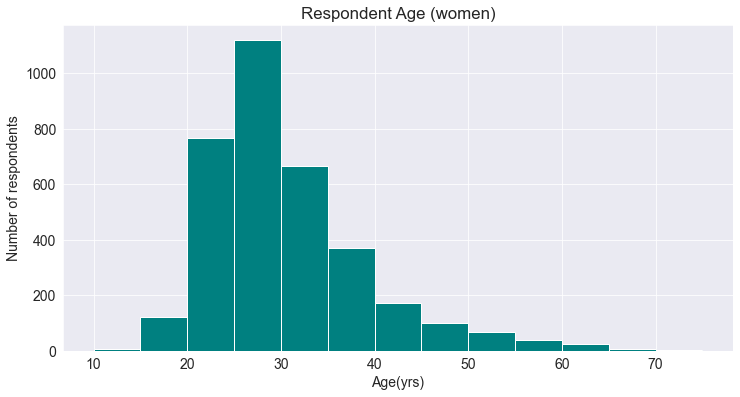

In [39]:
plt.figure(figsize=(12, 6))
plt.title('Respondent Age (women)')
plt.xlabel('Age(yrs)')
plt.ylabel('Number of respondents')
plt.hist(women_df.Age, bins=np.arange(10,80,5), color='teal');

# Age Groups: Women vs. Men

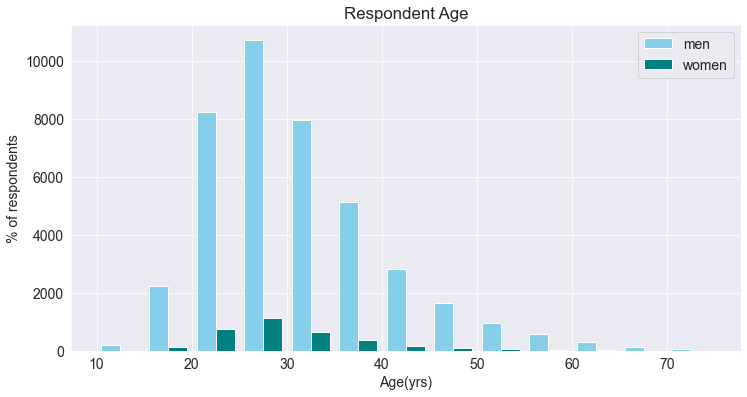

In [48]:
plt.figure(figsize=(12, 6))
plt.title('Respondent Age')
plt.xlabel('Age(yrs)')
plt.ylabel('% of respondents')
plt.hist([men_df.Age, women_df.Age], bins=np.arange(10,80,5), color=['skyblue','teal'], label=['men','women'])
plt.legend(loc='upper right');

# Hobbyist

In [28]:
women_hobbyist_pct = len(women_df[women_df.Hobbyist == 'Yes']) * 100 / women_df.Gender.count()
men_hobbyist_pct = len(men_df[men_df.Hobbyist == 'Yes'])  * 100 / men_df.Gender.count()

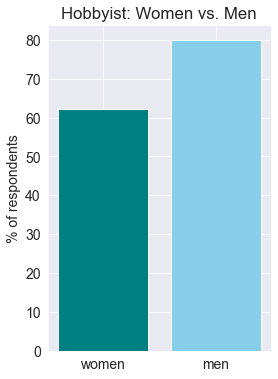

In [29]:
plt.figure(figsize=(4, 6))
plt.title('Hobbyist: Women vs. Men')
plt.ylabel('% of respondents')
plt.bar(['women', 'men'], [women_hobbyist_pct, men_hobbyist_pct], color=['teal', 'skyblue']);

# Data Conclusions

## 1. Number of people coding before 18

In [30]:
# selecting data for men and women where starting to code age is less then 18
women_start_age = women_df[women_df.Age1stCode < 18]
men_start_age = men_df[men_df.Age1stCode < 18]

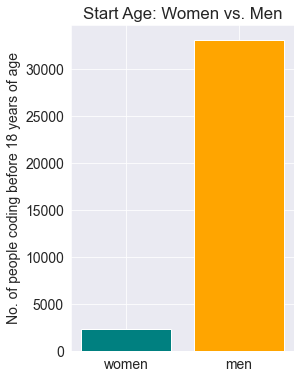

In [33]:
plt.figure(figsize=(4, 6))
plt.title('Start Age: Women vs. Men')
plt.ylabel('No. of people coding before 18 years of age')
plt.bar(['women', 'men'], [women_start_age.Age1stCode.count(), men_start_age.Age1stCode.count()], color=['teal', 'orange']);

## 2.Gender gaps based on ages


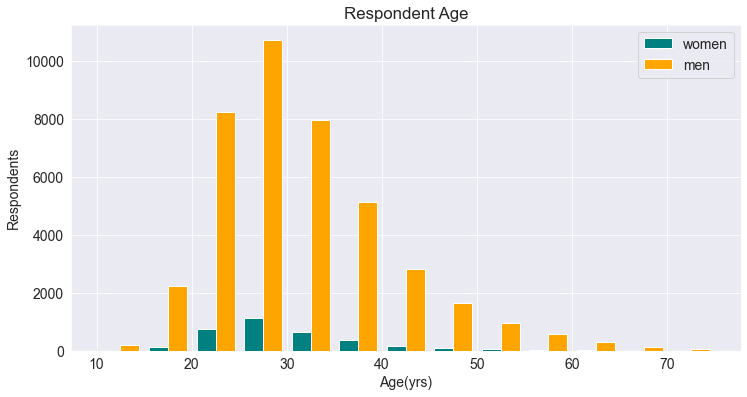

In [34]:
plt.figure(figsize=(12, 6))
plt.title('Respondent Age')
plt.xlabel('Age(yrs)')
plt.ylabel('Respondents')
plt.hist([women_df.Age, men_df.Age], bins=np.arange(10,80,5), color=['teal','orange'], label=['women','men'])
plt.legend(loc='upper right');

##  3. Efficiency of women in coding compared to men

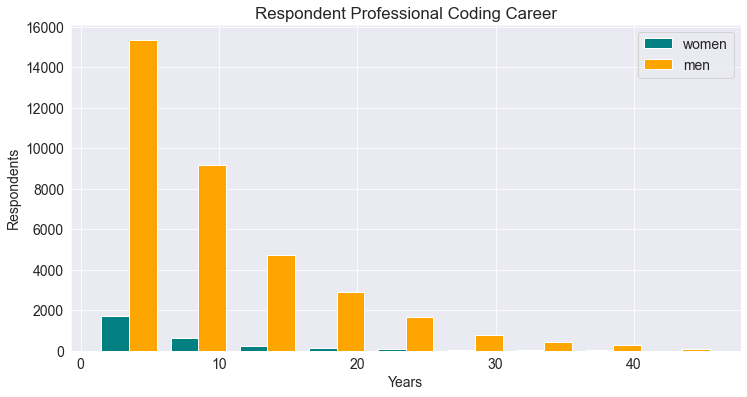

In [35]:
plt.figure(figsize=(12, 6))
plt.title('Respondent Professional Coding Career')
plt.xlabel('Years')
plt.ylabel('Respondents')
plt.hist([women_df.YearsCodePro, men_df.YearsCodePro], bins=np.arange(1,50,5), color=['teal','orange'], label=['women','men'])
plt.legend(loc='upper right');

## 4.Average professional coding experience between the genders

In [63]:
women_df.YearsCodePro.mean()

6.917073170731707

In [62]:
men_df.YearsCodePro.mean()

9.181188314810102

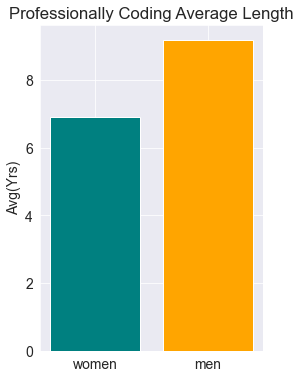

In [37]:
plt.figure(figsize=(4, 6))
plt.title('Professionally Coding Average Length')
plt.ylabel('Avg(Yrs)')
plt.bar(['women', 'men'], [women_df.YearsCodePro.mean(), men_df.YearsCodePro.mean()], color=['teal', 'orange']);

## 5.Education qualifications of the two genders

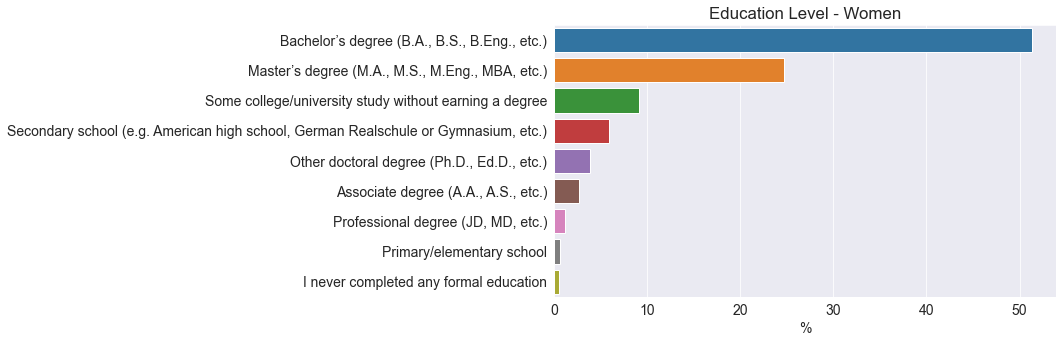

In [60]:
women_ed_pct = women_df.EdLevel.value_counts() * 100 / women_df.EdLevel.count()
sns.barplot(x=women_ed_pct, y=women_ed_pct.index)
plt.title('Education Level - Women')
plt.xlabel('%');
plt.ylabel(None);


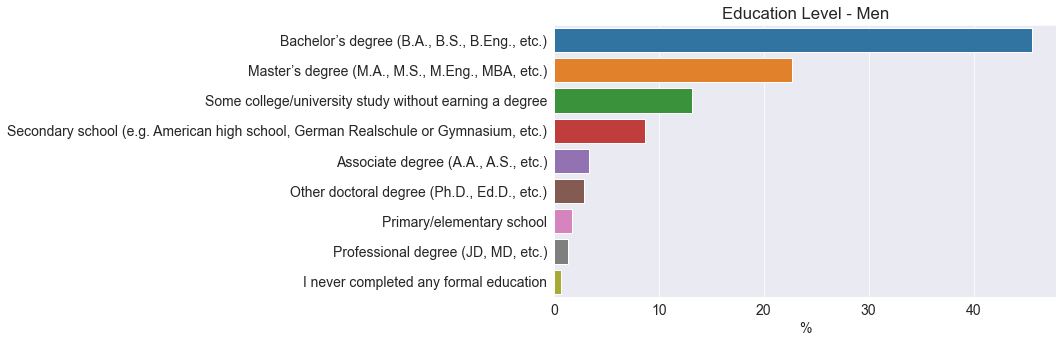

In [61]:
men_ed_pct = men_df.EdLevel.value_counts() * 100 / men_df.EdLevel.count()
sns.barplot(x=men_ed_pct, y=men_ed_pct.index)
plt.title('Education Level - Men')
plt.xlabel('%');
plt.ylabel(None);
